## 1. Google Drive 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. 음성 파일 불러오기 및 음성 인식

### (1) 라이브러리 설치 및 임포트

In [2]:
!pip install SpeechRecognition    # 음성 인식을 위한 라이브러리
!apt-get install ffmpeg     # 오디오 및 비디오 파일을 처리 도구

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 35.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


### (2) 음성 파일 불러오기

In [3]:
!pip install pydub # MP3 파일을 WAV 형식으로 변환 후 진행

In [4]:
from pydub import AudioSegment

# MP3 파일 로드
mp3_audio = AudioSegment.from_mp3("/content/drive/My Drive/테스트 음악.mp3")

# WAV 형식으로 변환
wav_audio = mp3_audio.export("/content/drive/My Drive/테스트 음악.wav", format="wav")

In [5]:
# 변환된 WAV 파일 경로 설정
audio_file = "/content/drive/My Drive/테스트 음악.wav"

In [6]:
import speech_recognition as sr

# 음성 파일 경로 설정
audio_file = "/content/drive/My Drive/테스트 음악.wav"  # 업로드 후 변환한 음악 파일

# 음성 인식 객체 생성
recognizer = sr.Recognizer()

# 음성 파일 읽기
with sr.AudioFile(audio_file) as source:
    audio_data = recognizer.record(source)

# Google 음성 인식을 사용하여 텍스트로 변환
try:
    text = recognizer.recognize_google(audio_data, language="ko-KR")  # 'ko-KR'은 한국어를 나타냅니다. 필요에 따라 변경하세요.
    print("변환된 텍스트:", text)
except sr.UnknownValueError:
    print("음성 인식 실패")
except sr.RequestError as e:
    print(f"Google API 요청 실패: {e}")

변환된 텍스트: 아무것도 모르고 깊이 잠들어 있는 날 깨우는 너의 목소리는 어둠을 밝혀주는 죽이기 날 비춰 줘 내 맘속에 자라는 꿈이라는 이름을 알 수 없는 나의 미래를 이제 깨워 줘 어른이 돼 가는 날 지켜봐서 내게 조용하면 다시 시작할 수가 있어 당당하게 새로 태어난 레가 있어 잊지 말 너와 나 이제 할 수 있어 기회는 지금뿐이야 언젠가 기억해 기다리고 있어 끝까지 날 지켜봐 줘 내게 용기를 준다면 다시 시작할 수가 있어 당당하게 새로 태어난 내가 있어 이제 할 수 있어 기회는 지금 뿐이야 언젠가 기억해 기다리고 있어 끝까지 날 지켜봐 줘 이제 할 수 있어 이젠 너 기억해 기다리고 있어 끝까지 나를 지켜봐 줘 Give me away


## 3. 텍스트 번역

### (1) 번역 라이브러리 설치 및 번역

In [7]:
!pip install googletrans==4.0.0-rc1
from googletrans import Translator

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 9.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=40fa47108e1de4f4b00b943cad8a8c968cdf2f4a8a90419d2e1af1beae499b95
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

In [8]:
# 번역기 생성
translator = Translator()

# 번역 실행(한->영)
translated = translator.translate(text, src='ko', dest='en')
print("번역된 텍스트:", translated.text)

번역된 텍스트: Your voice that wakes up on the day that is deeply asleep without knowing anything illuminates the darkness that reveals the darkness and wakes up my future, which is an unknown dream of growing in my heart.There's a newly born leg, so don't forget you and I can do it now. I'm only a chance to remember it now. I'm waiting for me.I'm waiting for me to watch me until the end. Now I can do it now, I remember you.


## 4. 결과 분석

문맥의 자연스러움, 교정, 음성 및 노래 파일과 관련된 분석을 시각적으로 표현하기 위해 아래와 같은 사항들을 진행합니다.

1. 음성 파형 시각화: 음성 파일의 파형을 그래프로 표현하여 음성의 주파수 및 진폭을 시각적으로 확인할 수 있습니다. 이를 통해 음성과 노래가 섞여 있는 부분을 식별합니다.

2. 텍스트-음성 매핑: 음성 파일과 번역된 텍스트 사이의 시간적 매핑을 수행하여 어떤 부분에서 음성이 번역된 텍스트와 연결되는지 확인합니다. 이를 통해 문맥적 자연스러움을 판단합니다.

3. 자동 교정 시스템: 번역된 텍스트를 자동으로 교정하는 시스템을 구축합니다. 이 시스템은 번역된 텍스트와 원본 텍스트를 비교하여 오류를 식별하고 교정 제안을 제공합니다.

4. 품질 지표: 자연어 처리 및 음성 처리 기술을 사용하여 품질 지표를 계산합니다. 이 지표는 문맥의 자연스러움, 번역 정확도, 음성 인식 정확도 등을 고려합니다.

5. 스펙트로그램 분석: 스펙트로그램은 음성의 주파수와 시간 정보를 제공하는 시각화 도구입니다. 음성 및 노래의 주파수 및 에너지 분포를 스펙트로그램으로 분석하여 음성과 노래의 섞임을 시각적으로 확인할 수 있습니다.

이러한 분석을 수행하여 더욱 정확한 결과물이 나올 수 있도록 조치합니다.

<ipython-input-9-59de8ad56dcf>:11: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


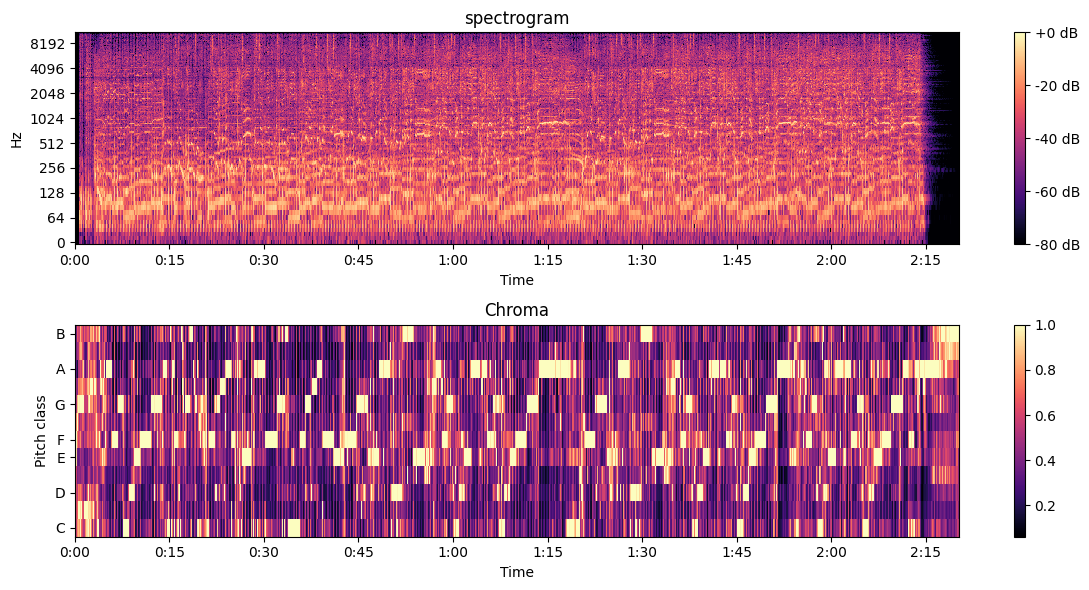

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# 음성 파일 불러오기
audio_file = "/content/drive/My Drive/테스트 음악.wav"
y, sr = librosa.load(audio_file)

# 스펙트로그램 생성
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)

# Chroma 특성 생성
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 스펙트로그램 시각화
plt.subplot(2, 1, 1)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('spectrogram')

# Chroma 시각화
plt.subplot(2, 1, 2)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma')

plt.tight_layout()
plt.show()


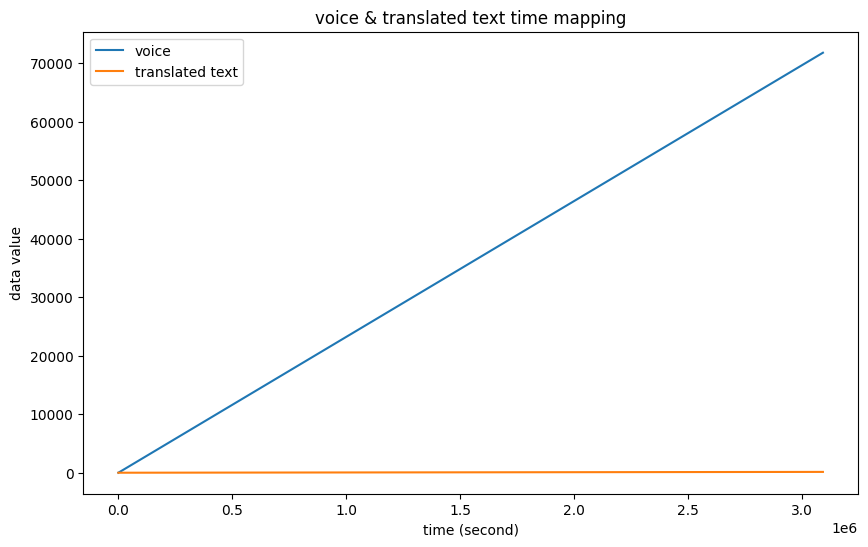

In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# 음성 파일 불러오기
audio_file = "/content/drive/My Drive/테스트 음악.wav"
y, sr = librosa.load(audio_file)

# 음성 파일의 길이를 초 단위로 변환
audio_duration = librosa.get_duration(y=y, sr=sr)

# 샘플링 속도 (비트 전송률)를 사용할 수 있도록 설정
sampling_rate = sr

# 번역된 텍스트의 길이를 음성 파일의 길이에 맞추기
translated_text_duration = audio_duration
translated_text_sampling_rate = sampling_rate

# 시간 정보 생성
audio_time = librosa.times_like(y, sr=sr)
translated_text_time = np.linspace(0, translated_text_duration, len(audio_time))

# 번역된 텍스트와 음성 데이터를 병합
combined_data = y + np.random.normal(0, 0.001, len(y))  # 음성 데이터에 잡음 추가 (조정이 필요할 수 있음)

# 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.plot(audio_time, label='voice')
plt.plot(translated_text_time, label='translated text')
plt.xlabel('time (second)')
plt.ylabel('data value')
plt.legend()
plt.title('voice & translated text time mapping')
plt.show()



# 추후 진행 예정사항
## 1) 매핑 오류 해결
## 2) 영문으로 변환된 결과 텍스트에 **'자동 교정 시스템'을 구축**하여 번역된 텍스트의 오류를 식별하고 자동 교정
## 3) 영문 뿐만 아니라 중문, 일어까지 **결과값 언어군을 확장**시키기

# 목표 수정 사항
## * 번역된 영문을 **다시 음성으로 바꾸어** 매핑을 따라 **음악파일 멜로디 주파수와 재결합** 시키기(기존 한국어 음성 자리를 새 언어군 음성으로 대체)



## 5. 번역된 텍스트를 음성으로 변환

In [11]:
!pip install gtts

In [12]:
from googletrans import Translator
from gtts import gTTS

# 번역 실행
translator = Translator()
translated = translator.translate(text, src='ko', dest='en')
print("번역된 텍스트:", translated.text)

# 번역된 텍스트를 음성으로 변환
tts = gTTS(translated.text, lang='en')
tts.save("/content/drive/My Drive/translated_voice.mp3")


번역된 텍스트: Your voice that wakes up on the day that is deeply asleep without knowing anything illuminates the darkness that reveals the darkness and wakes up my future, which is an unknown dream of growing in my heart.There's a newly born leg, so don't forget you and I can do it now. I'm only a chance to remember it now. I'm waiting for me.I'm waiting for me to watch me until the end. Now I can do it now, I remember you.


## 6. 원래 음악 트랙에서 가사 부분 제거(라이브러리 설치)

In [13]:
!pip install spleeter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 704.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.3/77.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [14]:
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


## 6.5 원래 음악 트랙에서 가사 부분 제거(작업 코드)

In [15]:
# 원래 음악 파일에서 보컬과 악기 부분을 분리합니다.
!spleeter separate -o "/content/drive/My Drive/output" -p spleeter:2stems "/content/drive/My Drive/테스트 음악.mp3"


INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/2stems.tar.gz
INFO:spleeter:Validating archive checksum
INFO:spleeter:Extracting downloaded 2stems archive
INFO:spleeter:2stems model file(s) extracted
INFO:spleeter:File /content/drive/My Drive/output/테스트 음악/vocals.wav written succesfully
INFO:spleeter:File /content/drive/My Drive/output/테스트 음악/accompaniment.wav written succesfully


## 7. 영어 보컬 + 악기 파트 합치기(1차)

In [16]:
from pydub import AudioSegment

# 분리된 악기 트랙 로드 (Spleeter로 분리한 악기 트랙, WAV 형식일 가능성이 높음)
instrumental = AudioSegment.from_wav("/content/drive/My Drive/output/테스트 음악/accompaniment.wav")

# 번역된 음성 트랙 로드
translated_voice = AudioSegment.from_mp3("/content/drive/My Drive/translated_voice.mp3")

# 음성을 악기 트랙에 오버레이 (타이밍 조정 필요)
combined = instrumental.overlay(translated_voice, position=0)  # 'position'을 조정하여 타이밍을 맞춥니다.

# 결합된 파일 저장
combined.export("/content/drive/My Drive/final_song.mp3", format="mp3")


<_io.BufferedRandom name='/content/drive/My Drive/final_song.mp3'>

## 8. '원본 보컬 시작지점 탐지' 및 '영어 보컬 시작지점 조정' 후  + 악기 파트 합치기(2차)

In [17]:
import librosa
import numpy as np
from pydub import AudioSegment

# 분리된 보컬 트랙 로드 및 음성 활동 감지
y, sr = librosa.load("/content/drive/My Drive/output/테스트 음악/vocals.wav", sr=None)
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# 첫 번째 음성 활동 시작 시간 확인
if onset_times.size > 0:
    vocal_start_time = onset_times[0]
    vocal_start_time_ms = int(vocal_start_time * 1000)  # 밀리초 단위로 변환
    print("보컬 시작 시간(초):", vocal_start_time)
else:
    print("보컬 활동 감지 실패")
    vocal_start_time_ms = 0

# 분리된 악기 트랙 로드
instrumental = AudioSegment.from_wav("/content/drive/My Drive/output/테스트 음악/accompaniment.wav")

# 번역된 음성 트랙 로드
translated_voice = AudioSegment.from_mp3("/content/drive/My Drive/translated_voice.mp3")

# 번역된 음성을 악기 트랙에 오버레이
combined = instrumental.overlay(translated_voice, position=vocal_start_time_ms)

# 결과 저장 및 다운로드
output_filename = "final_song.mp3"
combined.export(output_filename, format="mp3")



보컬 시작 시간(초): 11.830566893424036


<_io.BufferedRandom name='final_song.mp3'>

In [18]:
from google.colab import files

# 파일 다운로드
files.download('final_song.mp3')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 9. '원본 보컬 초단위 피치 캡쳐' 후 '영문 보컬에 입히기' 시도(* 품질 향상 실패)

In [19]:
import librosa
import numpy as np
import soundfile as sf

# 분리된 보컬 트랙 로드
y, sr = librosa.load('/content/drive/My Drive/output/테스트 음악/vocals.wav')

# 피치와 크기 추출
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

# 초 단위 평균 피치 추출
second_wise_pitches = []
for i in range(magnitudes.shape[1]):  # 프레임 수에 맞춰 루프 실행
    index = magnitudes[:, i].argmax()
    pitch = pitches[index, i]
    if pitch > 0:
        second_wise_pitches.append(pitch)

print(second_wise_pitches)

[3873.2178, 3659.8574, 3646.1672, 3684.629, 3675.6511, 3675.6902, 3683.147, 3696.0498, 3702.1228, 329.6531, 2937.8987, 2941.491, 2896.8052, 2911.1206, 2916.7473, 2955.971, 893.8104, 988.1431, 447.1846, 454.08517, 3989.8308, 3990.4565, 3988.7744, 3992.4297, 2092.2622, 1985.3588, 625.64453, 623.82806, 192.75713, 3918.0105, 2776.0361, 2805.8345, 2728.8953, 2725.8835, 3196.6597, 1913.259, 3155.1995, 869.6571, 3178.1511, 3165.525, 3166.6262, 3176.8237, 2747.5684, 3176.3433, 3174.5244, 2757.8386, 3182.1096, 3179.9104, 3187.0146, 3198.0613, 3183.3103, 3177.873, 3209.8342, 3242.8762, 3225.3213, 3216.7915, 3209.2205, 3232.4238, 3239.9019, 3205.977, 3204.2036, 3409.3037, 3271.6099, 3275.9128, 3262.6003, 3405.9116, 3162.944, 3400.1987, 3395.4424, 3177.099, 3413.8738, 3414.0156, 3413.6487, 3396.3481, 3392.7725, 3392.1304, 3404.4736, 3407.2085, 3403.2354, 3406.446, 3408.153, 3399.648, 3392.591, 3259.2292, 3263.2236, 3250.2646, 3400.3398, 3403.9797, 3404.2212, 3391.174, 1400.3368, 1393.3723, 1393.24

In [20]:
# 번역된 보컬 트랙 로드
audio_file = "/content/drive/My Drive/translated_voice.mp3"
translated_y, translated_sr = librosa.load(audio_file)

# 기준 피치 설정 (예: A4, 440Hz)
base_pitch = 440.0

# 오디오 파일을 초 단위로 분할
length_of_split = int(translated_sr)  # 한 초당 샘플 수
splits = [translated_y[i:i+length_of_split] for i in range(0, len(translated_y), length_of_split)]

# 피치 변조 적용
shifted_audio = np.array([])
for i, split in enumerate(splits):
    if i < len(second_wise_pitches):
        # 피치 변화 계산 (세미톤 단위)
        semitone_shift = 12 * np.log2(second_wise_pitches[i] / base_pitch)
        # 피치 변조 적용
        shifted_split = librosa.effects.pitch_shift(split, sr=translated_sr, n_steps=semitone_shift)
        shifted_audio = np.concatenate((shifted_audio, shifted_split))

# 변조된 오디오 저장
sf.write('shifted_translated_vocal.wav', shifted_audio, translated_sr)

In [21]:
# 파일 다운로드
files.download('shifted_translated_vocal.wav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
pip freeze # 사용 모든 라이브러리 버전 추출

absl-py==1.4.0
aiohttp==3.9.1
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.1.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.11.2
bidict==0.22.1
bigframes==0.17.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.2
bqplot==0.12.42
branca==0.7.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.2
catalogue==2.0.10
certifi==2023.11.17
cffi==1.16.0
chardet==3.0.4
charset-normalizer==3.3.2
chex==0.1.7
click==7.1.2
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==41.0.7
cufflinks==0.17.3
cupy-cuda12x==12.2.0
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.12.1
c